In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [1]:
import lightgbm as lgbm

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("merishnasuwal/breast-cancer-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.92k/7.92k [00:00<00:00, 4.25MB/s]

Extracting files...
Path to dataset files: /Users/cyuab/.cache/kagglehub/datasets/merishnasuwal/breast-cancer-prediction-dataset/versions/2


In [12]:
df = pd.read_csv(path+"/Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [21]:
from aeon.transformations.collection import Normalizer
import numpy as np
X = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
normaliser = Normalizer()
Xt = normaliser.fit_transform(X)
mean=np.mean(Xt, axis=-1)
std = np.std(Xt, axis=-1)
assert np.allclose(mean, 0)
assert np.allclose(std, 1)

In [ ]:
X = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
mean=np.mean(X, axis=-1)
std = np.std(X, axis=-1)
mean, std

(array([[ 2.,  5.],
        [ 8., 11.]]),
 array([[0.81649658, 0.81649658],
        [0.81649658, 0.81649658]]))

In [32]:
assert np.allclose(mean, 0)

AssertionError: 

In [27]:
assert np.allclose(3, 0)

AssertionError: 

In [44]:
from aeon.datasets import load_japanese_vowels, load_plaid

j_vowels, j_labels = load_japanese_vowels()
p_vowels, p_labels = load_plaid()
print(type(j_vowels[0].shape), "  ", type(p_vowels[0].shape))
print("shape first =", j_vowels[3].shape, "shape 11th =", j_vowels[10].shape)

<class 'tuple'>    <class 'tuple'>
shape first = (12, 20) shape 11th = (12, 23)


In [45]:
p_vowels[10]

array([[-2.0633e-06,  4.3200e-06,  7.0533e-06, -1.4200e-06,  6.9633e-06,
        -4.4967e-06,  9.9300e-06,  5.3833e-06,  1.0000e-06,  5.8100e-06,
        -6.3334e-08,  8.1667e-06,  7.1733e-06,  2.6733e-06,  6.3200e-06,
        -4.2433e-06,  5.1700e-06,  2.6100e-06,  5.8333e-07,  8.6333e-06,
        -4.9333e-07,  2.1033e-06,  2.7300e-06,  2.3467e-06,  5.3333e-08,
         8.3333e-07,  5.3533e-06,  5.0633e-06, -1.5433e-06,  8.0933e-06,
        -2.9233e-06,  3.6600e-06,  5.4000e-06, -3.0133e-06,  7.9300e-06,
        -1.5400e-06,  3.7067e-06,  7.1533e-06, -2.4333e-07,  4.3693e-04,
         5.3840e-03,  9.3535e-03,  9.0151e-03,  7.6368e-03,  6.6586e-03,
         7.4842e-03,  8.8284e-03,  8.9793e-03,  7.6378e-03,  6.6078e-03,
         7.5065e-03,  8.7920e-03,  8.9693e-03,  7.6240e-03,  6.6053e-03,
         7.4780e-03,  8.7812e-03,  8.9485e-03,  7.6055e-03,  6.5826e-03,
         7.4683e-03,  8.7730e-03,  8.9223e-03,  7.5808e-03,  6.5785e-03,
         7.4600e-03,  8.7535e-03,  8.9059e-03,  7.5

In [46]:
Xt = normaliser.fit_transform(p_vowels[10])

In [47]:
Xt

array([[[-7.35779857e-01, -7.35599747e-01, -7.35522624e-01,
         -7.35761706e-01, -7.35525164e-01, -7.35848518e-01,
         -7.35441456e-01, -7.35569745e-01, -7.35693423e-01,
         -7.35557705e-01, -7.35723426e-01, -7.35491209e-01,
         -7.35519238e-01, -7.35646210e-01, -7.35543315e-01,
         -7.35841368e-01, -7.35575763e-01, -7.35647996e-01,
         -7.35705180e-01, -7.35478043e-01, -7.35735559e-01,
         -7.35662293e-01, -7.35644610e-01, -7.35655425e-01,
         -7.35720135e-01, -7.35698126e-01, -7.35570591e-01,
         -7.35578774e-01, -7.35765185e-01, -7.35493280e-01,
         -7.35804123e-01, -7.35618369e-01, -7.35569274e-01,
         -7.35806662e-01, -7.35497887e-01, -7.35765092e-01,
         -7.35617052e-01, -7.35519803e-01, -7.35728505e-01,
         -7.23393273e-01, -5.83807322e-01, -4.71804373e-01,
         -4.81352628e-01, -5.20242580e-01, -5.47843357e-01,
         -5.24548324e-01, -4.86620533e-01, -4.82362756e-01,
         -5.20214364e-01, -5.49276724e-0

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1, 300)

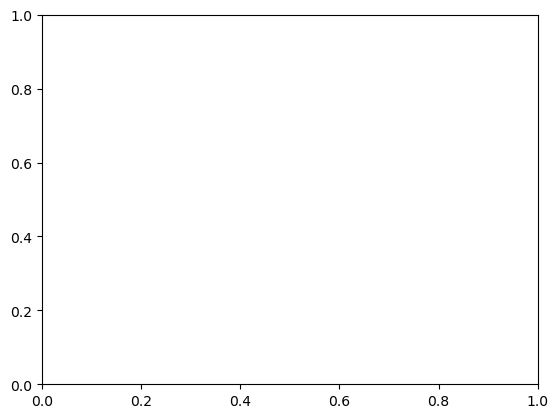

In [43]:
plt.plot(Xt)

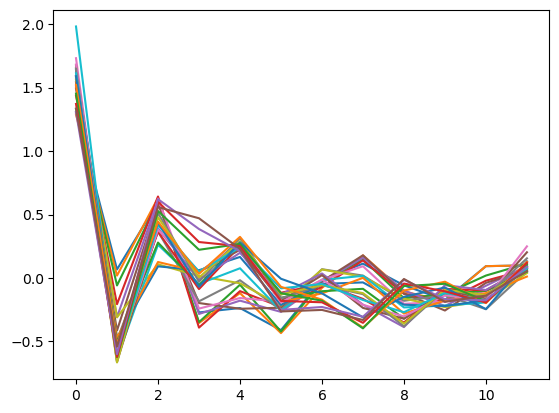

In [13]:
plt.plot(j_vowels[1])

In [1]:
import numpy as np

X = np.random.random((1, 100))  # Univariate series length 100
print(X.shape)
X = np.random.random((3, 200))  # three channel multivariate series length 200
print(X.shape)
X = np.random.random((10, 1, 50))  # Collection of 10 univariate series of length 50
print(X.shape)
X = np.random.random((5, 26, 100))  # Collection of 5 multivariate time series with 26
# channels, length 100
print(X.shape)

(1, 100)
(3, 200)
(10, 1, 50)
(5, 26, 100)


In [14]:
import numpy as np

from aeon.classification import DummyClassifier
from aeon.regression import DummyRegressor

X = np.random.random((5, 1, 10))  # Collection of five series
y1 = np.array(["run", "walk", "run", "run", "walk"])
y2 = np.array([1, 0, 1, 1, 0])
y3 = np.array([0.5, 1.11, 0.545, -0.3675, 2.662])
cls = DummyClassifier()
reg = DummyRegressor()
cls.fit(X, y1)
print(cls.predict(X))
cls.fit(X, y2)
print(cls.predict(X))
reg.fit(X, y2)
print(reg.predict(X))
reg.fit(X, y3)
print(reg.predict(X))

['run' 'run' 'run' 'run' 'run']
[1 1 1 1 1]
[0.6 0.6 0.6 0.6 0.6]
[0.8899 0.8899 0.8899 0.8899 0.8899]


In [33]:
import warnings

warnings.filterwarnings("ignore")

In [34]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_UCR_UEA_dataset
from sktime.transformations.panel import channel_selection
from sktime.transformations.panel.rocket import Rocket

In [35]:
# cs = channel_selection.ElbowClassSum()  # ECS
cs = channel_selection.ElbowClassPairwise()  # ECP

In [36]:
rocket_pipeline = make_pipeline(cs, Rocket(), RidgeClassifierCV())

In [40]:
data = "BasicMotions"
X_train, y_train = load_UCR_UEA_dataset(data, split="train", return_X_y=True)
X_test, y_test = load_UCR_UEA_dataset(data, split="test", return_X_y=True)

In [41]:
rocket_pipeline.fit(X_train, y_train)

AssertionError: <code object _fit at 0x139946ef0, file "/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sktime/transformations/panel/rocket/_rocket.py", line 93> != <code object _generate_kernels at 0x12bb4bc00, file "/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sktime/transformations/panel/rocket/_rocket_numba.py", line 14>

In [42]:
from sktime.transformations.panel.channel_selection import ElbowClassPairwise
from sktime.utils._testing.panel import make_classification_problem
X, y = make_classification_problem(n_columns=3, n_classes=3, random_state=42)
cs = ElbowClassPairwise()
cs.fit(X, y)
Xt = cs.transform(X)

In [44]:
cs.distance_frame_

,Centroid_badminton_running,Centroid_badminton_standing,Centroid_badminton_walking,Centroid_running_standing,Centroid_running_walking,Centroid_standing_walking
0,39.594365,55.752162,48.440187,63.609638,57.246801,10.716982
1,57.681242,24.390185,27.769918,60.457571,62.338595,16.370151
2,20.175723,24.126704,22.331360,25.671667,22.991254,4.897423
3,12.546064,12.438991,12.741693,6.317531,6.695617,3.585219
4,10.101068,8.865721,9.221755,6.520057,6.715585,1.299970
5,23.463985,14.568464,13.953242,18.878171,19.768278,7.228231


In [46]:
cs.train_time_

18

In [2]:
import dill
dill.dump_session('notebook_env.db')

/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>.
  StockPickler.save(self, obj, save_persistent_id)
/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


PicklingError: Can't pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: it's not found as __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter

In [6]:
import numpy as np
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]


In [9]:
precision_score(y_true, y_pred, average='macro')

/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.1111111111111111

In [10]:
precision_score(y_true, y_pred, average='micro')


0.3333333333333333

In [11]:
precision_score(y_true, y_pred, average='weighted')


/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.1111111111111111

In [12]:
precision_score(y_true, y_pred, average=None)


/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.33333333, 0.        , 0.        ])

In [14]:
y_pred = [0, 0, 0, 0, 0, 0]


In [15]:
precision_score(y_true, y_pred, average=None)


/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.33333333, 0.        , 0.        ])

In [16]:
precision_score(y_true, y_pred, average=None, zero_division=1)


array([0.33333333, 1.        , 1.        ])

In [17]:
precision_score(y_true, y_pred, average=None, zero_division=np.nan)

array([0.33333333,        nan,        nan])

# 9 Archive
It archives some useful code segments I have used in doing this project.

## Test the indexing of array in Python

In [1]:
test = [1,2,3,4]

In [ ]:
test, len(test)

In [ ]:
test[0:4]

In [ ]:
test[3] # test[3] is the last entry of test rather than test[4].

## Save and read from CSV

In [ ]:
import pandas as pd
df = pd.read_csv("../data/temp.csv",
                     low_memory=False)
df.to_csv("../data/temp.csv",
              index=False)
df

## Cast String to Float

In [ ]:
# https://stackoverflow.com/questions/64584736/typecast-a-column-in-pandas-dataframe
# https://stackoverflow.com/questions/8420143/valueerror-could-not-convert-string-to-float-id
# https://stackoverflow.com/questions/1614236/how-do-i-convert-all-of-the-items-in-a-list-to-floats
# https://stackoverflow.com/questions/52112553/convert-a-list-of-floats-to-multiple-columns-of-floats-in-pandas/52113073
# https://stackoverflow.com/questions/3877209/how-to-convert-an-array-of-strings-to-an-array-of-floats-in-numpy

In [11]:
# https://www.digitalocean.com/community/tutorials/python-convert-string-to-float
input_1 = '10.5674'
print(len(input_1))

input_1 = float(input_1)

print(type(input_1))
print('Float Value =', input_1)


7
<class 'float'>
Float Value = 10.5674


## Save string in csv

In [ ]:
# https://stackoverflow.com/questions/12877189/float64-with-pandas-to-csv
# https://stackoverflow.com/questions/12877189/float64-with-pandas-to-csv
# https://stackoverflow.com/questions/21433484/write-float-list-to-csv-file
# https://stackoverflow.com/questions/50817163/pd-to-csv-set-float-format-with-list

In [5]:
# https://stackoverflow.com/questions/51476690/how-to-use-pandas-to-csv-float-format
from io import StringIO
import pandas as pd

mystr = StringIO("""0.02506602 0.05754493 0.36854688
0.02461631 0.0599653 0.43078098
0.02502534 0.06209149 0.44955311
0.4267356675182389 0.1718682822340447 0.5391386354945895
0.426701667727433 0.17191008887193007 0.5391897818631616
0.4266676661681287 0.17195189807522643 0.5392409104354972""")

df = pd.read_csv(mystr, delim_whitespace=True, header=None)

print(df.dtypes)

# 0    float64
# 1    float64
# 2    float64
# dtype: object

file_loc = r'test.dat'
# sep=‘\s+‘什么意思？这是代表什么分隔符号？
# https://blog.csdn.net/weixin_37706204/article/details/120827447
df.to_csv(file_loc, sep=' ', index=False, header=False, float_format="%.8f")

df = pd.read_csv(file_loc, delim_whitespace=True, header=None)

print(df[0].iloc[-1])

# 0.42666767

0    float64
1    float64
2    float64
dtype: object
0.42666767


/var/folders/2w/d1h5t_nn2slf5r75qqdvlt0m0000gn/T/ipykernel_18332/2427653110.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(mystr, delim_whitespace=True, header=None)
/var/folders/2w/d1h5t_nn2slf5r75qqdvlt0m0000gn/T/ipykernel_18332/2427653110.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_loc, delim_whitespace=True, header=None)


In [13]:
df

,0,1,2
0,0.025066,0.057545,0.368547
1,0.024616,0.059965,0.430781
2,0.025025,0.062091,0.449553
3,0.426736,0.171868,0.539139
4,0.426702,0.171910,0.539190
5,0.426668,0.171952,0.539241


In [4]:
import dill
dill.dump_session('notebook_env.db')

/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>.
  StockPickler.save(self, obj, save_persistent_id)
/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


PicklingError: Can't pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: it's not found as __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter

## Save variables

In [8]:
import dill
x = 3

In [9]:
# https://stackoverflow.com/questions/34342155/how-to-pickle-or-store-jupyter-ipython-notebook-session-for-later

dill.dump_session('test.db')

/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot locate reference to <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>.
  StockPickler.save(self, obj, save_persistent_id)
/Users/cyuab/miniconda3/envs/tscc/lib/python3.12/site-packages/dill/_dill.py:422: PicklingWarning: Cannot pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


PicklingError: Can't pickle <class '__main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter'>: it's not found as __main__.__DW_OUTPUT_FORMATTER__.<locals>.DataWranglerFormatter

In [1]:
import dill
dill.load_session('notebook_env.db')

In [ ]:
# https://stackoverflow.com/questions/59463737/panda-dataframe-persisting-a-list-of-numbers-and-then-reading-it

In [3]:
df3 = pd.DataFrame({'tom': [10,-5,3], 'dave': [15,-1,4], 'al': [14,-1,-1]})
df3


df3.to_csv('my.csv', index=False)

In [6]:
df3

,tom,dave,al
0,10,15,14
1,-5,-1,-1
2,3,4,-1


In [7]:
len(df3.loc[0])

3

In [8]:
df3in = pd.read_csv('my.csv')

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tom     3 non-null      int64
 1   dave    3 non-null      int64
 2   al      3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes
